In [1]:
import networkx as nx
from RobotGraph import RobotGraph
import gym
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('FetchReachEnv-v0')
home = str(Path.home())
model_path = home + '/Documents/SAC_GCN/CustomGymEnvs/envs/fetchreach/CustomFetchReach/assets/fetch/robot.xml'
rg = RobotGraph(env.sim, model_path,
               ['robot0:torso_lift_joint', 'robot0:head_pan_joint', 'robot0:head_tilt_joint',
                'robot0:shoulder_pan_joint'])


nodelist = [env.sim.model.body_name2id(n.attrib['name']) for n in rg.node_list]
edgelist = [(env.sim.model.body_name2id(rg.node_list[f].attrib['name']), env.sim.model.body_name2id(rg.node_list[t].attrib['name'])) for f, t in zip(rg.edges_from, rg.edges_to)]

In [6]:
env = gym.make('AntEnv-v0')
home = str(Path.home())
model_path = home + '/Documents/SAC_GCN/CustomGymEnvs/envs/ant/xml/AntEnv_v0_Normal.xml'
rg = RobotGraph(env.sim, model_path)


nodelist = [env.sim.model.body_name2id(n.attrib['name'] if 'name' in n.attrib else 'world') for n in rg.node_list]
edgelist = [(env.sim.model.body_name2id(rg.node_list[f].attrib['name'] if 'name' in rg.node_list[f].attrib else 'world'), env.sim.model.body_name2id(rg.node_list[t].attrib['name']  if 'name' in rg.node_list[t].attrib else 'world')) for f, t in zip(rg.edges_from, rg.edges_to)]

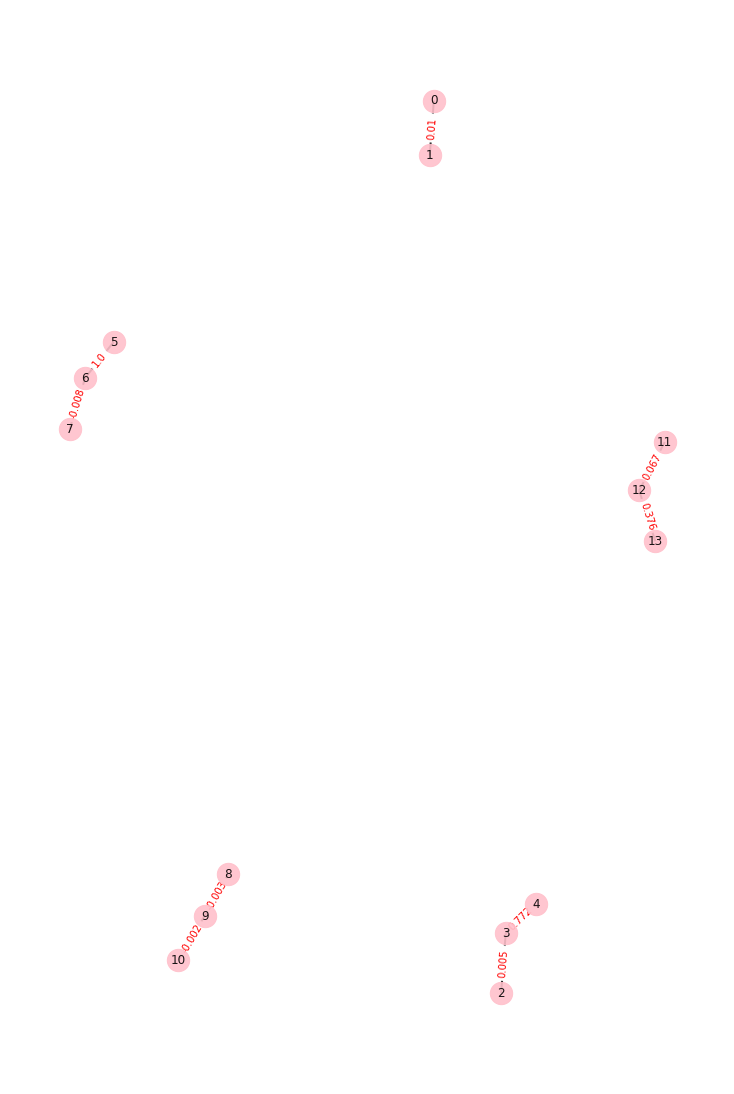

In [7]:
g = nx.Graph()
g.add_nodes_from(nodelist)
g.add_edges_from(edgelist)
pos = nx.spring_layout(g)
plt.figure(figsize=(10, 15))
nx.draw(g,pos,edge_color='black',width=2,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in g.nodes()})
# nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: 'j' if kind is not None else 'w' for edge, kind in zip(edgelist, rg.edge_list)},font_color='red')
nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: round(rg.edge_features[i, 0], 3) for edge, i in zip(edgelist, range(rg.edge_features.shape[0]))},font_color='red')
plt.axis('off')
plt.show()

In [ ]:
print(rg.edges_from)

In [ ]:
print(rg.edges_to)

In [ ]:
print(rg.edges_from)

In [ ]:
print(rg.edges_to)

In [ ]:
rg.edge_list

In [ ]:
nx.draw(g, with_labels=True)

In [ ]:
print(nodelist)

In [ ]:
print(edgelist)